## Q1

$f(x_{i+1}) = f(x_i) + f'(x_i)h+ \frac{f''(x_i)h^2}{2!} + \frac{f'''(x_i)h^3}{3!}  + \frac{f''''(x_i)h^4}{4!} + O(h^5) \cdots (1)$

$f(x_{i-1}) = f(x_i) - f'(x_i)h+ \frac{f''(x_i)h^2}{2!} - \frac{f'''(x_i)h^3}{3!}  + \frac{f''''(x_i)h^4}{4!} - O(h^5) \cdots (2)$

$f(x_{i+2}) = f(x_i) + f'(x_i)2h+ \frac{f''(x_i)4h^2}{2!} + \frac{f'''(x_i)8h^3}{3!}  + \frac{f''''(x_i)16h^4}{4!} + O(h^5) \cdots (3)$

$f(x_{i-2}) = f(x_i) - f'(x_i)2h+ \frac{f''(x_i)4h^2}{2!} - \frac{f'''(x_i)8h^3}{3!}  + \frac{f''''(x_i)16h^4}{4!} - O(h^5) \cdots (4)$

$(1) - (2) = f(x_{i+1}) - f(x_{i-1}) =  f'(x_i)*2h + \frac{f'''(x_i)*2h^3}{3!} + O(h^5)\cdots (5)$

$(3) - (4) = f(x_{i+2}) - f(x_{i-2}) =  f'(x_i)*4h + \frac{f'''(x_i)*16h^3}{3!} + O(h^5)\cdots (5)$

為了把 $h^3$ 的項消掉，必須把 $(5)*8 - (6)$，這樣才會只留下 $O(h^5), f'(x_i), f(x_{i+1}), f(x_{i-1}), f(x_{i+2}), f(x_{i-2}), h$

會得到 $8*[f(x_{i+1}) - f(x_{i-1})] - [f(x_{i+2}) - f(x_{i-2})] = 12h*f'(x_i) + O(h^5)$

整理後可得 $f'(x_i) = \frac{-f(x_{i+2}) + 8f(x_{i+1}) - 8f(x_{i-1}) + f(x_{i-2})}{12h} +O(h^4)$

## Q2

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

t = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
x = np.array([0, 0.7, 1.8, 3.4, 5.1, 6.3, 7.3, 8.0, 8.4])
h = 2

Forward_velocity = (-x[7] + 4*x[6] - 3*x[5]) / (2*h)
print(f"Forward (Velocity): {Forward_velocity}")

Forward_acceleration = (-x[8] + 4*x[7] - 5*x[6] + 2*x[5]) / h**2
print(f"Forward (Acceleration): {Forward_acceleration}")

Center_velocity = (x[6] - x[4]) / (2*h)
print(f"Center (Velocity): {Center_velocity}")

Center_acceleration = (x[6] - 2*x[5] + x[4]) / (h**2)
print(f"Center (Acceleration): {Center_acceleration}")

Forward (Velocity): 0.5750000000000002
Forward (Acceleration): -0.07499999999999973
Center (Velocity): 0.55
Center (Acceleration): -0.050000000000000044


## Q3

In [61]:
import numpy as np

f1 = lambda x: x**x
f2 = lambda x: np.log(np.cos(x) + np.sin(x))
stopping_criterion = 1e-6

def Romberg(f, start, end, case):
    k = 20
    I = np.zeros((k, k))
    value = -1
    for i in range(k):
        x = np.linspace(start, end, 2**(i)+1) 
        for j in range(0, i+1):
            h = x[1] - x[0]
            
            if j == 0:
                sum = 0
                for idx in range(len(x)-1): # 計算幾次分割
                    sum += (f(x[idx]) + f(x[idx+1])) * h / 2
                I[i, j] = sum
            else:
                I[i, j] = (4**j * I[i, j-1] - I[i-1, j-1]) / (4**j - 1)
            
            # 計算誤差並檢查停止條件
            E_t = 100
            if i > 0 and j > 0:     
                E_t = abs(I[i, j] - I[i-1, j-1])
            else:
                E_t = 1
                
            if E_t < stopping_criterion:
                value = I[i, j]
                break

        if E_t < stopping_criterion:
            break

    print(f'Approximated value ({case}): {value}')

Romberg(f1, 0, 1, 'case1')
Romberg(f2, 0, np.pi/2, 'case2')



Approximated value (case1): 0.7834307468214234
Approximated value (case2): 0.37156907098245867


## Q4

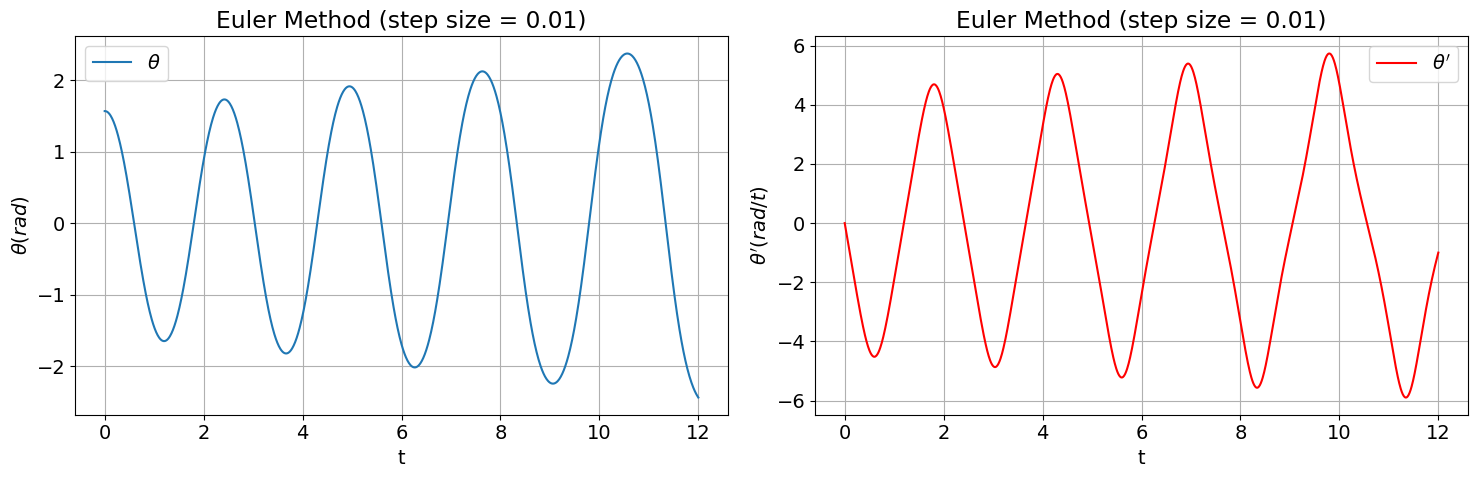

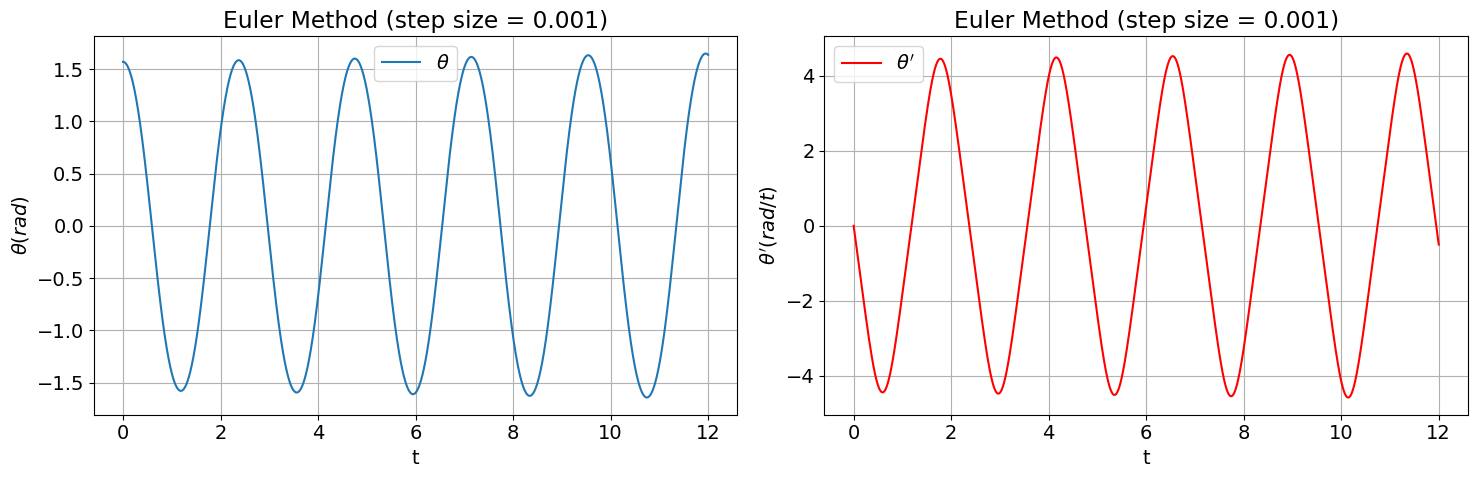

In [62]:
import numpy as np

def Euler_Method(h):
    theta_list = []
    omega_list = []
    
    theta = np.pi / 2  
    omega = 0  
    g = 9.81  
    l = 1.0  
    t = 0  
    
    while t <= 12:
        theta_list.append(theta)
        omega_list.append(omega)
        
        
        omega_new = omega - (g / l) * np.sin(theta) * h
        theta_new = theta + omega * h
        
        theta = theta_new
        omega = omega_new
        t += h
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(f't')
    plt.ylabel(r'$\theta (rad)$')
    plt.title(f'Euler Method (step size = {h})')
    plt.plot(np.arange(0, 12+h, h),theta_list, label=r"$\theta$")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel(f't')
    plt.ylabel(r"$\theta' (rad / t)$")
    plt.plot(np.arange(0, 12+h, h),omega_list, label=r"$\theta'$", color='red')
    plt.grid(True)
    plt.title(f'Euler Method (step size = {h})')
    plt.legend()
    plt.tight_layout()
    plt.show()


Euler_Method(0.01)
Euler_Method(0.001)


在 step = 0.01 的時候，振幅會隨著時間越來越大，且波形會越來越不規則性，這個在角速度的圖能明顯觀察到，當 step = 0.001 的時候，不穩定的狀況改善很多。

## Bonus

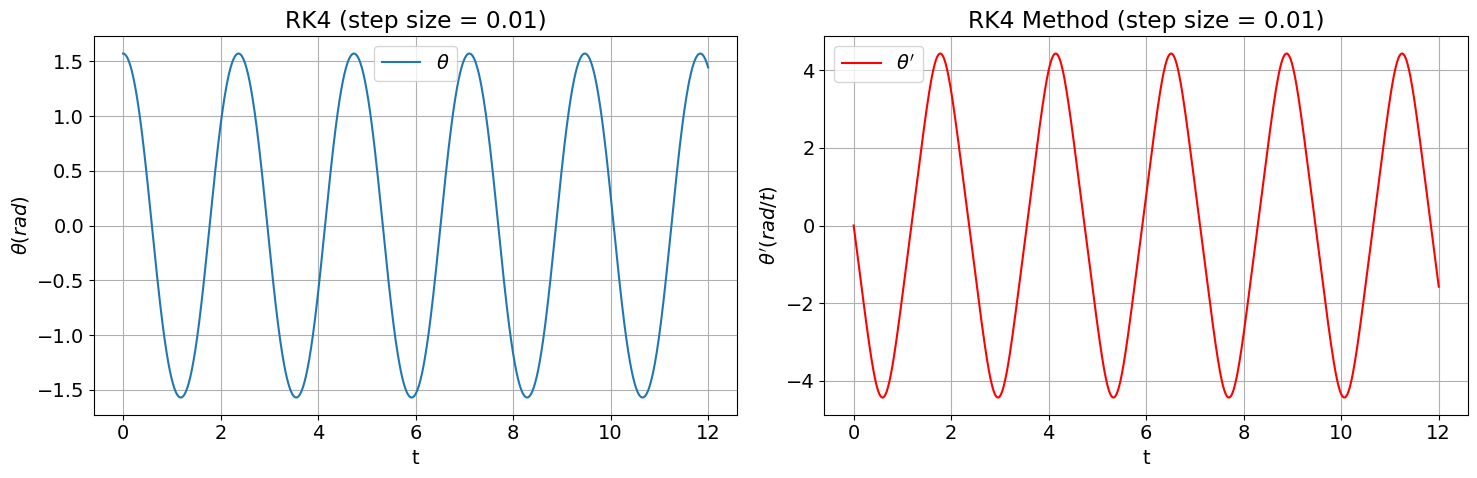

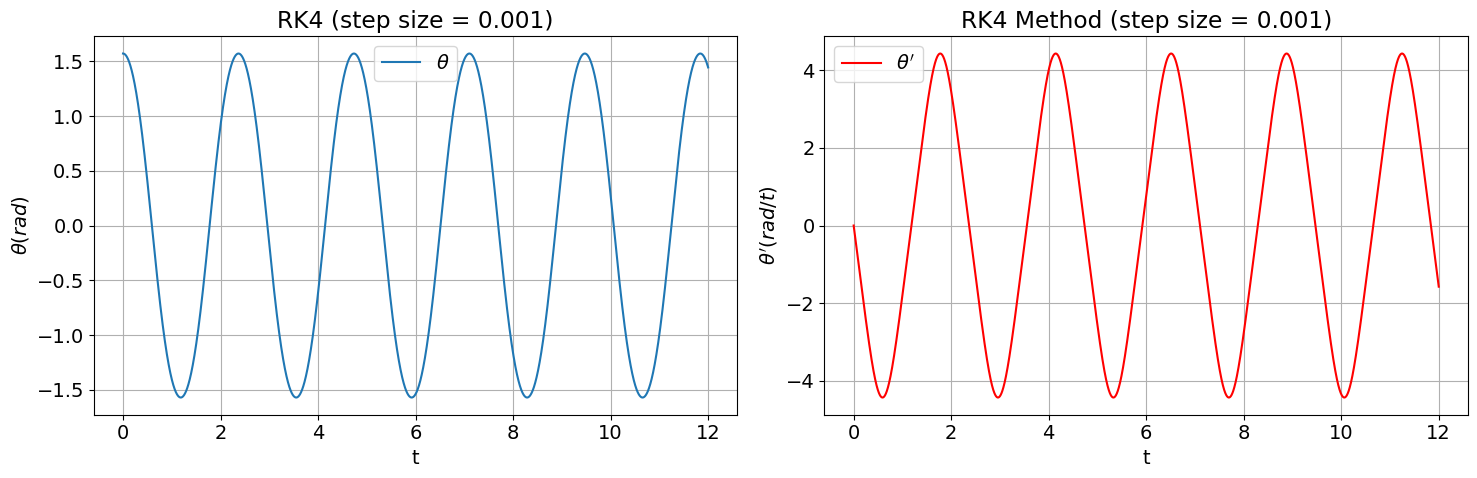

In [63]:
def RK4_Method(h):
    theta_list = []
    omega_list = []
    
    theta = np.pi / 2  
    omega = 0  
    g = 9.81  
    l = 1.0  
    t = 0  
    
    while t <= 12:
        theta_list.append(theta)
        omega_list.append(omega)
        
        
        def dtheta_dt(omega):
            return omega
        
        def domega_dt(theta):
            return -(g / l) * np.sin(theta)
        
        
        k1_omega = domega_dt(theta)
        k1_theta = dtheta_dt(omega)
        
        k2_omega = domega_dt(theta + 0.5 * h * k1_theta)
        k2_theta = dtheta_dt(omega + 0.5 * h * k1_omega)
        
        k3_omega = domega_dt(theta + 0.5 * h * k2_theta)
        k3_theta = dtheta_dt(omega + 0.5 * h * k2_omega)
        
        k4_omega = domega_dt(theta +  h * k3_theta)
        k4_theta = dtheta_dt(omega +  h * k3_omega)
        
        theta +=  h * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) / 6
        omega +=  h * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega) / 6
        
        t += h
    theta_list = np.array(theta_list)
    omega_list = np.array(omega_list)

    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(f't')
    plt.ylabel(r'$\theta (rad)$')
    plt.title(f'RK4 (step size = {h})')
    plt.plot(np.arange(0, 12+h, h),theta_list, label=r"$\theta$")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel(f't')
    plt.ylabel(r"$\theta' (rad / t)$")
    plt.plot(np.arange(0, 12+h, h),omega_list, label=r"$\theta'$", color='red')
    plt.grid(True)
    plt.title(f'RK4 Method (step size = {h})')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
RK4_Method(0.01)
RK4_Method(0.001)

使用 RK4 後，在 step = 0.01 時，其表現相較於使用 Euler Method 好非常多，step = 0.001 時，其波形和 step = 0.01 時，並無太大差異，算出來的數值解穩定性高。